In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../Data/student-por.csv")
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Undersøker korrelasjonen mellom variablene:

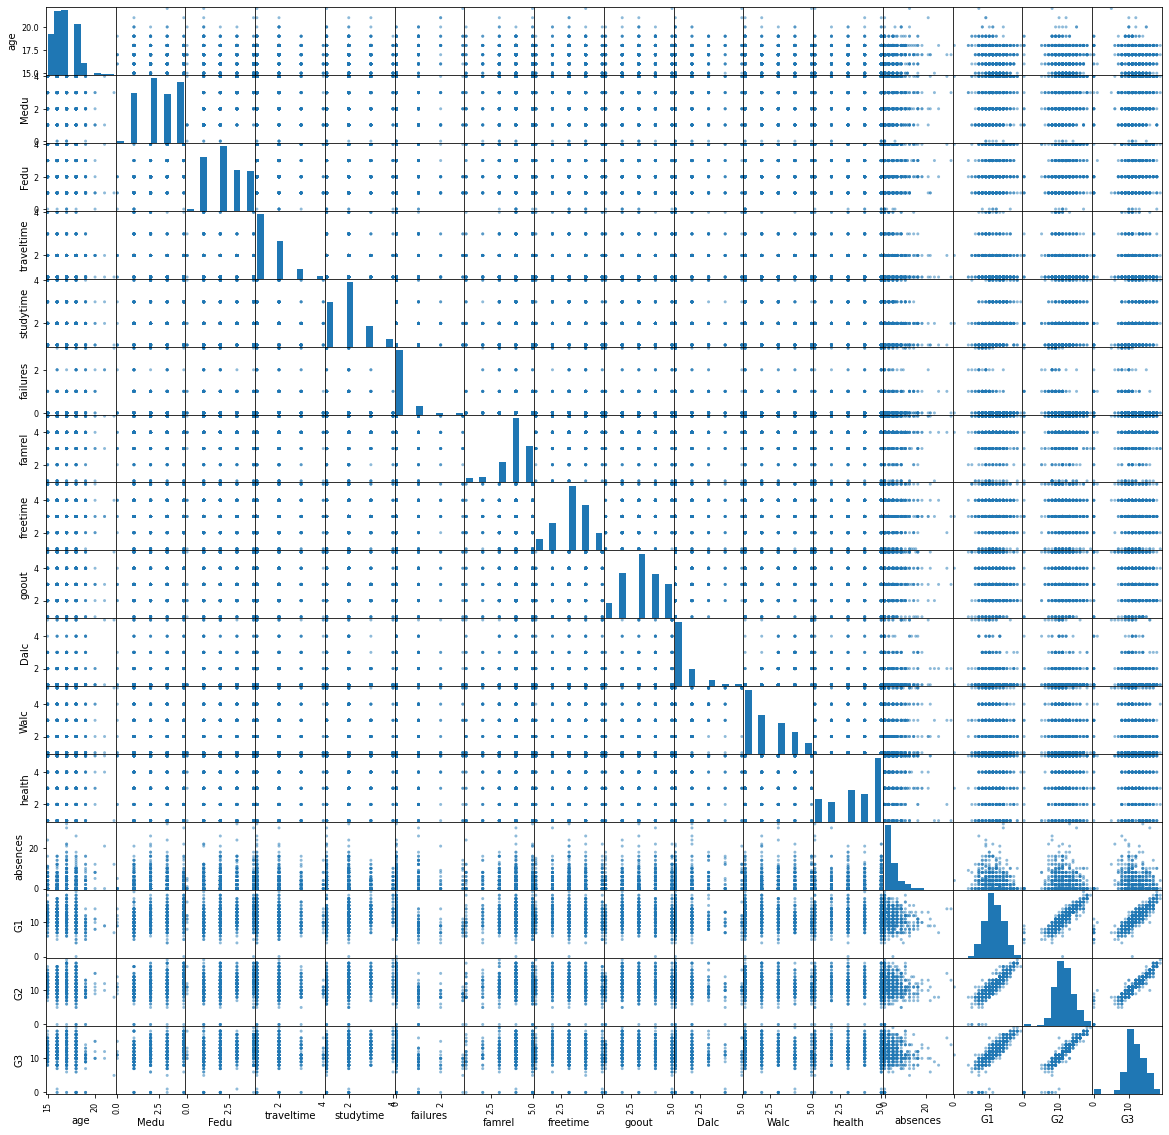

In [3]:
#pd.plotting.scatter_matrix(df, figsize=(20,20))
#plt.show()

Sjekker om dataene inneholder tomme 

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
categorical_cols=["sex", "school", "address", "Pstatus", "Mjob", "Fjob", "guardian", "famsize", "reason", "schoolsup", "famsup", "activities", "paid", "internet", "nursery", "higher", "romantic"]
#famrel, fedu, medu, traveltime, studytime, failures(maks 4), freetime, goout, Walc, Dalc, health, (G1, G2)
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, prefix_sep="_", drop_first = True)


In [6]:
#Model 1
X_1 = df.drop(["G3", ], axis=1)

#Model 2
X_2 = df[["G1", "G2"]]

#Model 3
#X_3 = []

#Response
Y = df["G3"]

X_1_train, X_1_test, X_2_train, X_2_test, Y_train, Y_test = train_test_split(X_1, X_2, Y, test_size = 0.20)

In [7]:
#Model 1 trening:
loo = LeaveOneOut()
loo.get_n_splits(X_1_train)
print(loo)

residuals = []
for train_index, test_index in loo.split(X_1_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    loo_train_x, loo_test_x = X_1_train.iloc[train_index], X_1_train.iloc[test_index]
    loo_train_y, loo_test_y = Y_train.iloc[train_index], Y_train.iloc[test_index]
    lm = LinearRegression().fit(loo_train_x, loo_train_y)
    residuals.append(lm.predict(loo_test_x) - loo_test_y)

LeaveOneOut()


In [14]:
MSE = (np.asarray(residuals)**2).mean()
display(MSE)
print(Y_train.var())
np.argmax(residuals)

1.6804554170753943

10.585912915392685


83